<a href="https://colab.research.google.com/github/Demosthene-OR/Student-AI-and-Data-Management/blob/main/02_analysis_quali_and_temporal_variables_oil_en.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


<img src="https://prof.totalenergies.com/wp-content/uploads/2024/09/TotalEnergies_TPA_picto_DegradeRouge_RVB-1024x1024.png" height="150" width="150">
<hr style="border-width:2px;border-color:#75DFC1">
<h1 style = "text-align:center" > Exploratory statistics </h1> 
<h2 style = "text-align:center"> Descriptive analysis of qualitative variables in a dataset </h2> 
<hr style="border-width:2px;border-color:#75DFC1">

### Context and objective

> Analyzing qualitative variables is an important step in understanding data, as they often provide valuable information about the interaction between variables in the dataset. <br>
> In general, they are more difficult to manipulate than numerical variables, and it is important to observe their relationship with the latter. <br>
> 
>
> The objective of this notebook is to **determine the modalities of a qualitative variable** and to see how it **interacts with a quantitative and temporal variable**. <br>
> This notebook will also familiarize you with simple methods of data management and date column management, as well as teach you how to graphically display the evolution of a measurement over time and the different modalities of a qualitative variable.
>
> Let's start by importing the packages.


* **(a)** Import the **`pandas`** , **`numpy`**, **`matplotlib`** and **`seaborn`**  packages under their usual aliases.
* **(b)** Load the data from the **`‘OilWell_Quali_Temporal.csv’`** file into a table named **`df`** and display the first 5 rows.

> The dataset contains information on bike rentals in Porto during 2011 and 2012. For each row, we have the following information: 
>
> |Variable|Description|
> |----------|------------|
> |**`'Well_ID'`**| Well identifier|
> |**`'Region'`**|Drilling region(North Sea, Quatar,..)|
> |**`'Operator'`**|Operating company (BP, TotalEnergies,..)|
> |**`'Maintenance_Type'`**|Maintenance type (Emergency, Corective, Routine)|
> |**`'Shift’`**|Shift type (Day,Night)|
> |**`'Equipment_Status'`**| Active, Failure, Standby|
> |**`'Weather_Condition'`**|General state of the weather|
> |**`'Alert_Level'`**|Maximum daily alert from the monitoring system| 
> |**`'Production_Date'`**|Date of daily production measurement|
> |**`'Last_Maintenance_Date'`**|Date of the most recent maintenance operation|
> |**`'No_of_Incidents'`**|Number of small operational incidents recorded that day|
> |**`'Production_Barrels'`**|Quantity of oil produced (in barrels)|
> |**`'Temperature_C'`**|Average surface temperature at the well|





In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# url = "https://raw.githubusercontent.com/Demosthene-OR/Student-AI-and-Data-Management/main/data/"
url = "./data/"
df = pd.read_csv(url+"OilWell_Quali_Temporal2.csv")

# Quick look
display(df.head())



,Well_ID,Region,Operator,Maintenance_Type,Shift,Equipment_Status,Weather_Condition,Alert_Level,Production_Date,Last_Maintenance_Date,No_of_Incidents,Production_Barrels,Temperature_C
0,W-15,Qatar,ExxonMobil,Corrective,Day,Active,Cloudy,Medium,2023-09-20,2023-03-06,2,581.17,48.0
1,W-07,Qatar,Chevron,Corrective,Day,Standby,Rainy,Low,2024-10-27,2024-08-06,5,403.57,41.5
2,W-07,Qatar,TotalEnergies,Routine,Night,Active,Rainy,Low,2024-05-27,2024-02-09,6,615.06,36.6
3,W-15,Texas,TotalEnergies,Routine,Night,Active,Sunny,Low,2024-02-24,2023-10-05,4,462.91,23.6
4,W-04,Texas,Shell,Corrective,Day,Active,Sandstorm,High,2023-04-20,2022-09-06,4,479.55,33.9



* **(c)** Afficher le type de chaque variable du jeu de données **`df`** en utilisant l'attribut **`dtypes`** de `pandas.DataFrame`. 



In [2]:
display(df.dtypes)

# display(df.info())
#display(df.describe(include='all'))

Well_ID                   object
Region                    object
Operator                  object
Maintenance_Type          object
Shift                     object
Equipment_Status          object
Weather_Condition         object
Alert_Level               object
Production_Date           object
Last_Maintenance_Date     object
No_of_Incidents            int64
Production_Barrels       float64
Temperature_C            float64
dtype: object


<hr style="border-width:2px;border-color:#75DFC1">
<h3 style = "text-align:center" > 1. Descriptive analysis of a qualitative variable </h3>  
<hr style="border-width:2px;border-color:#75DFC1">

* **(d)** Identify the **categorical variables** and store them in a table named **`cat_data`**.

<div class="alert alert-info">
<i class="fa fa-info-circle"></i> &emsp; 
    You can use the <code>pandas.DataFrame.select_dtypes()</code> function and the <code>include</code> attribute, which you can populate with a list of the type(s) you want to keep (in this case, “object” or “O”).
</div>




In [3]:
cat_data = df.select_dtypes(include='object')
cat_data.head()



,Well_ID,Region,Operator,Maintenance_Type,Shift,Equipment_Status,Weather_Condition,Alert_Level,Production_Date,Last_Maintenance_Date
0,W-15,Qatar,ExxonMobil,Corrective,Day,Active,Cloudy,Medium,2023-09-20,2023-03-06
1,W-07,Qatar,Chevron,Corrective,Day,Standby,Rainy,Low,2024-10-27,2024-08-06
2,W-07,Qatar,TotalEnergies,Routine,Night,Active,Rainy,Low,2024-05-27,2024-02-09
3,W-15,Texas,TotalEnergies,Routine,Night,Active,Sunny,Low,2024-02-24,2023-10-05
4,W-04,Texas,Shell,Corrective,Day,Active,Sandstorm,High,2023-04-20,2022-09-06



* **(e)** Using the **`value_counts`** method, display the count of different modalities for the variables **`"Weather_Condition"`**, **`"Alert_Level"`**, and **`"Region"`**.




In [4]:
print(cat_data["Weather_Condition"].value_counts())
print("------------------------------")
print(cat_data["Alert_Level"].value_counts())
print("------------------------------")
print(cat_data["Region"].value_counts())


Sandstorm    219
Rainy        207
Windy        196
Sunny        192
Cloudy       186
Name: Weather_Condition, dtype: int64
------------------------------
Low         611
Medium      295
High         67
Critical     27
Name: Alert_Level, dtype: int64
------------------------------
Texas        256
North Sea    215
Algeria      197
Abu Dhabi    194
Qatar        138
Name: Region, dtype: int64



> **`value_counts`** is commonly used to quickly visualize the modalities of a variable.
You can also easily find the most frequent mode of a qualitative variable using the **`mode`** method.

* **(f)**  Display **the most frequent mode** of the **`"Region"`** column and check that it matches the result found previously.



In [5]:
df['Region'].mode()
# Indeed, Abu Dhabi is the most frequent mode
# (it appears 210 times according to the result of .value_counts())


0    Texas
Name: Region, dtype: object


 > First, it is important to clearly identify and study the **frequency of modalities**. The quickest way to do this is by using **`.value_counts(normalize = True)`**. This parameter allows you to normalize these values and thus calculate the percentages for each modality. 
 
 * **(g)** Display the frequencies of different modalities of the variables **`"Weather_Condition"`**, **`"Alert_Level"`**, and **`"Region"`**.



In [6]:
print(cat_data["Weather_Condition"].value_counts(normalize = True))
print("------------------------------")
print(cat_data["Alert_Level"].value_counts(normalize = True))
print("------------------------------")
print(cat_data["Region"].value_counts(normalize = True))


Sandstorm    0.219
Rainy        0.207
Windy        0.196
Sunny        0.192
Cloudy       0.186
Name: Weather_Condition, dtype: float64
------------------------------
Low         0.611
Medium      0.295
High        0.067
Critical    0.027
Name: Alert_Level, dtype: float64
------------------------------
Texas        0.256
North Sea    0.215
Algeria      0.197
Abu Dhabi    0.194
Qatar        0.138
Name: Region, dtype: float64



<hr style="border-width:2px;border-color:#75DFC1">
<h3 style = "text-align:center"> 2. Interaction between a qualitative variable and a quantitative variable </h3> 
<hr style="border-width:2px;border-color:#75DFC1">

> Based on the previous question, we can see that there are far fewer bike rentals during the holidays. 
As for the seasons, the distribution is uniform.<br>
>
> To add more context, it would be interesting to create a qualitative variable that categorizes temperatures according to given **labels**.

* **(h)** In a new variable **`"production_labels"`**, divide the values in the column **`"Production_Barrels"`** into **four distinct classes** with **labels** $0, 1, 2, 3$ based on the quartiles of the variable **`"Production_Barrels"`**. Display also a set of summary statistics with describe() method.

<div class="alert alert-info">
<i class="fa fa-info-circle"></i> &emsp;
Use <code>pandas.qcut(column, labels = [...], q = 4)</code>.
</div>



In [7]:
df['production_labels'] = pd.qcut(df['Production_Barrels'], labels = [0, 1, 2, 3], q = 4)
display(df[['Production_Barrels','production_labels']].head())
display(df["Production_Barrels"].describe())


,Production_Barrels,production_labels
0,581.17,3
1,403.57,1
2,615.06,3
3,462.91,2
4,479.55,2


count    1000.000000
mean      432.840240
std        87.052666
min       121.610000
25%       373.475000
50%       429.040000
75%       485.222500
max       705.320000
Name: Production_Barrels, dtype: float64


* **(i)** Store **the total number of incidents** in a new variable **`group_incident_labels`** based on the qualitative variables **`"production_labels"`** and **`"Alert_Level"`**. Display this new dataframe.

<div class="alert alert-info">
<i class="fa fa-info-circle"></i> &emsp;
<code>pandas.groupby([column_list]).agg({“column1”:“operation”, ‘column2’:“operation”, ..})</code> <br>
 
allows you to group data based on the <code>[column_list]</code> and aggregate based on <code>column1, column2, ...</code>, applying the specified operation (this can be <code><b>sum, mean, min, max, unique</b></code>, etc.).
</div>



In [8]:
group_incident_labels = df.groupby(['production_labels','Alert_Level'])\
                        .agg({'No_of_Incidents': 'sum'})

# Note: the backslash “\” at the end of the first line of code
# allows operations to continue on the second line. 
# This can be useful if visibility is limited and you don't want to 
# chain all operations on the same line.

# We calculate the sum of the No_Incidents column to get the total number 
# of rentals.
print(group_incident_labels)


                               No_of_Incidents
production_labels Alert_Level                 
0                 Critical                 141
                  High                     183
                  Low                      646
                  Medium                   500
1                 Critical                   4
                  High                      75
                  Low                      797
                  Medium                   398
2                 Critical                   3
                  High                      33
                  Low                      813
                  Medium                   352
3                 Critical                   2
                  High                      23
                  Low                      722
                  Medium                   205



> We observe that with a critical alert and for a production label equal to $3$, i.e., when the daily production is above the 3rd quartile (here $485.222$ barrels using `df["Production_Barrels"].describe()`), there were a total of $2$ incidents recorded.
>
> To add a new column that will also calculate the **average number** of rentals, we can enter a **list of functions** to be executed (in the **`.agg()`** parameter) for the numeric variable **`“No_of_Incidents”`**.

* **(j)** Create a new variable **`group_incident_labels2`** by adding a column to the previous groupby with the average number of incidents based on the columns **`"production_labels"`** and **`"Alert_Level"`**. Display it.



In [9]:
group_incident_labels2 = df.groupby(['production_labels','Alert_Level']).agg({'No_of_Incidents': ['sum', 'mean']})
print(group_incident_labels2)



                              No_of_Incidents          
                                          sum      mean
production_labels Alert_Level                          
0                 Critical                141  5.875000
                  High                    183  5.228571
                  Low                     646  6.271845
                  Medium                  500  5.681818
1                 Critical                  4  4.000000
                  High                     75  4.411765
                  Low                     797  5.141935
                  Medium                  398  5.168831
2                 Critical                  3  3.000000
                  High                     33  4.125000
                  Low                     813  4.868263
                  Medium                  352  4.756757
3                 Critical                  2  2.000000
                  High                     23  3.285714
                  Low                     722  3


> On days when alert level is critical and the daily production is above 582.58 barrels (label 3), there are approximately 2.84 incidents on average.
> 
> This type of statistic is often useful, and the data can be easily represented **graphically**.
> 
> To refine our analysis, we will also consider the **temporal** dimension.
>
<hr style="border-width:2px;border-color:#75DFC1">
<h3 style = "text-align:center">  3. Analyzing a qualitative and quantitative variable by adding the temporal dimension </h3> 
<hr style="border-width:2px;border-color:#75DFC1">

> To integrate **time** into the analysis of different variables, we will manipulate objects of type **`pandas.Grouper`**.<br>
>
>**`pandas.groupby (pandas.Grouper()).agg()`** will allow us to group the data by date and aggregate it by the desired variable. <br>
>
> In order to better understand the results and the value of this object, we will use the **`matplotlib`** library to create some graphs. Later in the training, an entire module will be devoted to DataViz'.
>
* **(k)** Looking at the types of each variable, we can see that the **`datetime`** column is in *object* format (i.e., a string of characters).  <br>
To work with **`pandas.Grouper`** objects, you must first convert the **`datetime`** column to a suitable **format** (*datetime*) using the **`to_datetime`** function in **`pandas`**. <br>


* **(l)** Check that this column has been converted to the correct format. <br>

**Note**: Be careful not to confuse the column name with its type. In this case, the column is coincidentally called datetime, but it is not in datetime format. 



In [10]:
df["Production_Date"] = pd.to_datetime(df["Production_Date"])
df["Last_Maintenance_Date"] = pd.to_datetime(df["Last_Maintenance_Date"])

# Check the types of columns in the dataframe df:
df.dtypes
# We can clearly see that the datetime column is now in datetime format.



Well_ID                          object
Region                           object
Operator                         object
Maintenance_Type                 object
Shift                            object
Equipment_Status                 object
Weather_Condition                object
Alert_Level                      object
Production_Date          datetime64[ns]
Last_Maintenance_Date    datetime64[ns]
No_of_Incidents                   int64
Production_Barrels              float64
Temperature_C                   float64
production_labels              category
dtype: object


* **(m)** Using **`pd.Grouper()`**, create an object **`grouper_month`** that takes the following arguments: 
>* `key` the name of the column with the dates
>* `freq = m` to indicate that we want to group the data by month, `d` by day, `w` by week, etc.

<div class="alert alert-info">
<i class="fa fa-info-circle"></i> &emsp;
Use <code>pandas.Grouper(key = “column name”, freq = ‘m’)</code>.
</div>

* **(n)** Display the type of the variable **`grouper_month`**.



In [11]:
grouper_month = pd.Grouper(key = 'Production_Date', freq = 'm')

# Type of the variable group_month: 
type(grouper_month)
# We observe that the type is pandas.core.resample.TimeGrouper.
# To retrieve the information from this variable,
# it must be used with the .groupby() command.


pandas.core.resample.TimeGrouper


* **(o)** Create an object named **`groupby_month_alert`** by grouping by the list of variables **`[group_month, df[“Alert_Level”]]`** and calculating the average rentals in the column **`“Production_Barrels”`**. <br>
Apply the **`unstack`** method at the end to put the data in columns. <br>
Display the first 5 rows of the dataframe. <br>


* **(p)** Comment on the results obtained.



In [13]:
groupby_month_alert = df.groupby([grouper_month, df['Alert_Level']])\
                       .agg({'Production_Barrels':'mean'}).unstack()

groupby_month_alert.head()
# For the month of January 2023 (every day until January 31)
# there was an average of 283 barrels produced on days when the alert was critical.



Production_Barrels                                    
Alert_Level               Critical        High         Low      Medium
Production_Date                                                       
2023-01-31              283.336667  295.146667  455.960645  454.495000
2023-02-28                     NaN  426.366667  458.462857  410.881818
2023-03-31              262.890000  375.382000  443.100882  413.990000
2023-04-30              228.885000  462.384000  456.538333  386.484000
2023-05-31              368.160000  442.944000  444.877308  432.564545


* **(q)** The result contains **missing values** because one critical alerts are rare, and there no critical alert in february. Replace the missing values in the dataframe **`groupby_month_alert`** with the value $0$.



In [14]:
groupby_month_alert = groupby_month_alert.fillna(0)
groupby_month_alert.head()


Production_Barrels                                    
Alert_Level               Critical        High         Low      Medium
Production_Date                                                       
2023-01-31              283.336667  295.146667  455.960645  454.495000
2023-02-28                0.000000  426.366667  458.462857  410.881818
2023-03-31              262.890000  375.382000  443.100882  413.990000
2023-04-30              228.885000  462.384000  456.538333  386.484000
2023-05-31              368.160000  442.944000  444.877308  432.564545


* **(r)** Use **`.plot(figsize = (20, 4.5), style = 'o-');`** to display the results of the previous dataframe in a graph with an appropriate size (**`figsize`** parameter) and points marked on the figure (**`style`** parameter). Interpret this graph.



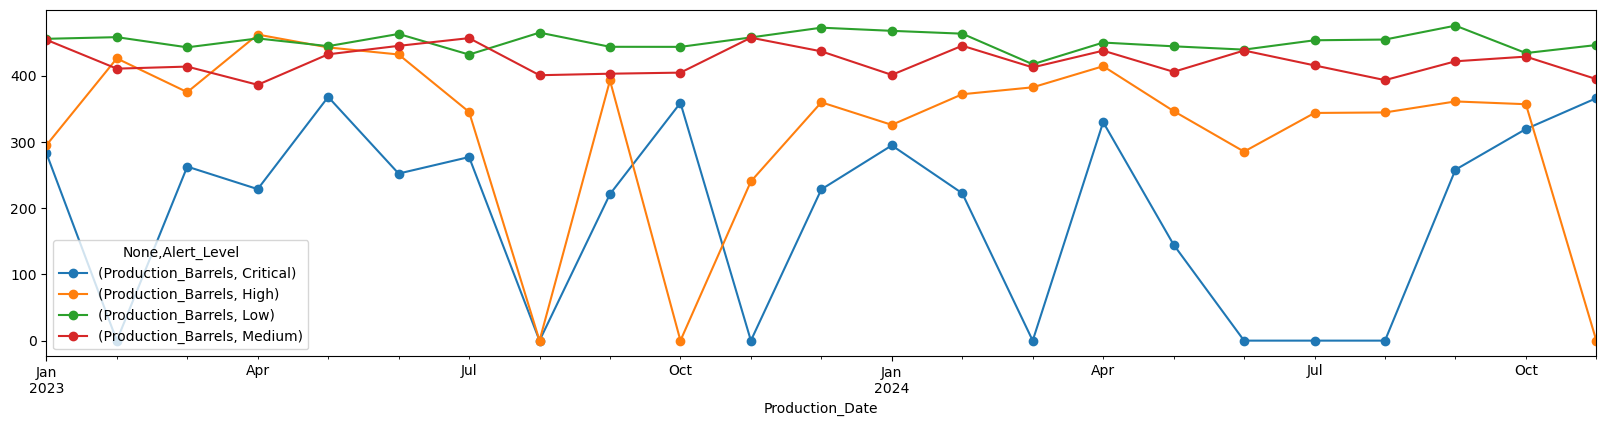

In [15]:
groupby_month_alert.plot(figsize = (20, 4.5), style = 'o-');





> All these steps have enabled us to represent the evolution over time of the average daily production according to level of alert.
> We note that the monthly average production is significantly lower when the alerts level is critical or high.




